# VGP の使い方

## Library

In [1]:
import numpy as np
import GPflow
%matplotlib inline 
import matplotlib.pyplot as plt

# 外れ値のある人工データ

In [2]:
rng = np.random.RandomState(0)

In [3]:
X1 = np.linspace(0,6,50).reshape(-1,1)
Y1 = np.sin(X1) + rng.randn(*X1.shape) * 0.1 + rng.randn(*X1.shape)**4.0*rng.randn(*X1.shape)*0.2

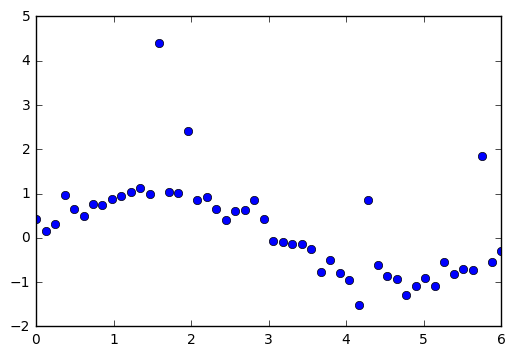

In [4]:
plt.plot(X1,Y1,'o')

## 通常のGaussian Process

In [5]:
model_gpr = GPflow.gpr.GPR(X1, Y1, 
                        kern=GPflow.kernels.RBF(1)) # RBF カーネルを使う

In [6]:
_ = model_gpr.optimize()

In [7]:
X_new = np.linspace(0,6,100)
f_pred = {}

In [8]:
f_pred['gpr'], f_var= model_gpr.predict_f(X_new.reshape(-1,1))

In [9]:
f_pred['gpr_plus'] = f_pred['gpr'].flatten() + 2*np.sqrt(f_var).flatten()
f_pred['gpr_minus']= f_pred['gpr'].flatten() - 2*np.sqrt(f_var).flatten()

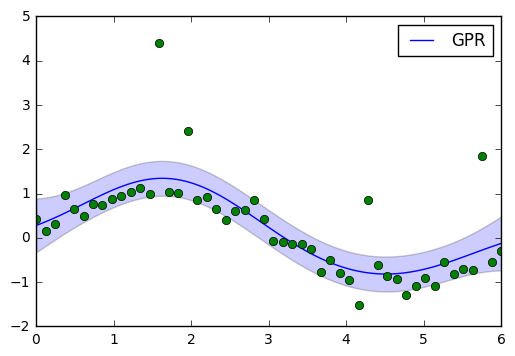

In [10]:
plt.fill_between(X_new, f_pred['gpr_plus'], f_pred['gpr_minus'], alpha=0.2)
plt.plot(X_new, f_pred['gpr'], label='GPR')
plt.legend()
plt.plot(X1, Y1, 'o')

## Student-t型尤度を用いるVGP

In [11]:
model_vgp = GPflow.vgp.VGP(X1, Y1, 
                        kern=GPflow.kernels.RBF(1),
                        likelihood=GPflow.likelihoods.StudentT()) # RBF カーネルを使う

In [12]:
_ = model_vgp.optimize()

In [13]:
f_pred['vgp'], f_var= model_vgp.predict_f(X_new.reshape(-1,1))

In [14]:
f_pred['vgp_plus'] = f_pred['vgp'].flatten() + 2*np.sqrt(f_var).flatten()
f_pred['vgp_minus']= f_pred['vgp'].flatten() - 2*np.sqrt(f_var).flatten()

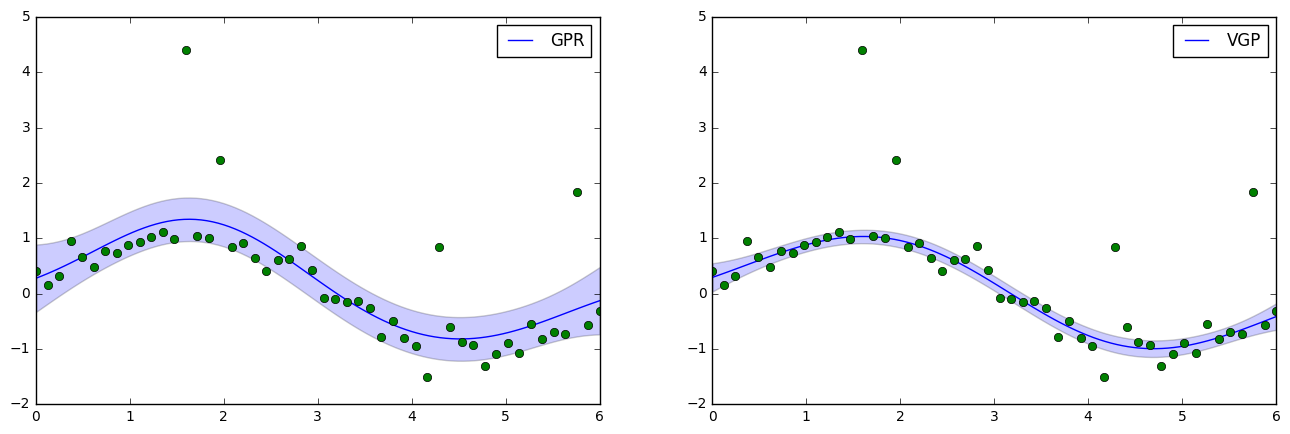

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.fill_between(X_new, f_pred['gpr_plus'], f_pred['gpr_minus'], alpha=0.2)
plt.plot(X_new, f_pred['gpr'], label='GPR')
plt.legend()
plt.plot(X1, Y1, 'o')
plt.subplot(1,2,2)
plt.fill_between(X_new, f_pred['vgp_plus'], f_pred['vgp_minus'], alpha=0.2)
plt.plot(X_new, f_pred['vgp'], label='VGP')
plt.legend()
plt.plot(X1, Y1, 'o')